### Importing Required Libraries

In [ ]:
import os
import shutil
from collections import defaultdict
from unidecode import unidecode
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tqdm import tqdm
import  cv2
import imghdr
from sklearn.model_selection import train_test_split
import random
from PIL import Image


### Dataset Balancing via Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=15,     
        width_shift_range=0.1,  
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.15,
        horizontal_flip=True,
        fill_mode='nearest')   



In [ ]:
input_root = Path('DataSets/Data')  
output_root = Path('AugmentedData') 
output_root.mkdir(parents=True, exist_ok=True)

In [17]:
TARGET_COUNT = 1000

In [ ]:
for class_folder in os.listdir(input_root):
    class_input_path = input_root / class_folder
    class_output_path = output_root / class_folder
    class_output_path.mkdir(parents=True, exist_ok=True)
    
   
    image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    current_count = len(image_files)
    if current_count == 0:
        print(f"تخطي الفئة '{class_folder}' لعدم وجود صور.")
        continue
    
    for img_name in image_files:
        src_path = class_input_path / img_name
        dst_path = class_output_path / img_name
        shutil.copy(src_path, dst_path)
    
    to_generate = TARGET_COUNT - current_count
    if to_generate <= 0:
        print(f"لا حاجة لإنشاء صور إضافية للفئة '{class_folder}'.")
        continue
    
    num_aug_per_image = to_generate // current_count
    remainder = to_generate % current_count
    
    print(f"إنشاء {to_generate} صورة للفئة '{class_folder}'...")
    
    for idx, img_name in enumerate(image_files):
        img_path = class_input_path / img_name
        try:
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)
            
            total_needed = num_aug_per_image
            if idx < remainder:
                total_needed += 1
            
            count = 0
            for _ in datagen.flow(img_array, batch_size=1, save_to_dir=class_output_path,
                                 save_prefix='aug', save_format='png'):
                count += 1
                if count >= total_needed:
                    break
        except Exception as e:
            print(f"خطأ في معالجة {img_path}: {e}")

print("[تم الانتهاء بنجاح]")

إنشاء 794 صورة للفئة 'Akhenaten'...
إنشاء 854 صورة للفئة 'AmenhotepIII'...
إنشاء 665 صورة للفئة 'Bent pyramid for senefru'...
إنشاء 736 صورة للفئة 'Colossoi of Memnon'...
إنشاء 755 صورة للفئة 'Goddess Isis'...
إنشاء 874 صورة للفئة 'Hatshepsut face'...
إنشاء 557 صورة للفئة 'Khafre Pyramid'...
إنشاء 819 صورة للفئة 'King Thutmose III'...
إنشاء 794 صورة للفئة 'Mask of Tutankhamun'...
إنشاء 880 صورة للفئة 'menkaure pyramid'...
إنشاء 804 صورة للفئة 'Nefertiti'...
إنشاء 839 صورة للفئة 'Pyramid_of_Djoser'...
إنشاء 737 صورة للفئة 'Ramesses II'...
إنشاء 812 صورة للفئة 'Ramessum'...
إنشاء 659 صورة للفئة 'sphinx'...
إنشاء 886 صورة للفئة 'Statue of King Zoser'...
إنشاء 904 صورة للفئة 'Statue of Tutankhamun with Ankhesenamun'...
إنشاء 651 صورة للفئة 'Temple_of_Hatshepsut'...
إنشاء 837 صورة للفئة 'Temple_of_Isis_in_Philae'...
إنشاء 818 صورة للفئة 'Temple_of_Kom_Ombo'...
إنشاء 782 صورة للفئة 'The Great Temple of Ramesses II'...
[تم الانتهاء بنجاح]


### Visualizing Class Distribution After Augmentation



Total images: 20339

Class-wise counts:
- AugmentedData: 0
- Akhenaten: 964
- AmenhotepIII: 959
- Bent pyramid for senefru: 974
- Colossoi of Memnon: 966
- Goddess Isis: 971
- Hatshepsut face: 961
- Khafre Pyramid: 988
- King Thutmose III: 968
- Mask of Tutankhamun: 976
- menkaure pyramid: 962
- Nefertiti: 966
- Pyramid_of_Djoser: 965
- Ramesses II: 970
- Ramessum: 961
- sphinx: 980
- Statue of King Zoser: 970
- Statue of Tutankhamun with Ankhesenamun: 961
- Temple_of_Hatshepsut: 978
- Temple_of_Isis_in_Philae: 968
- Temple_of_Kom_Ombo: 964
- The Great Temple of Ramesses II: 967


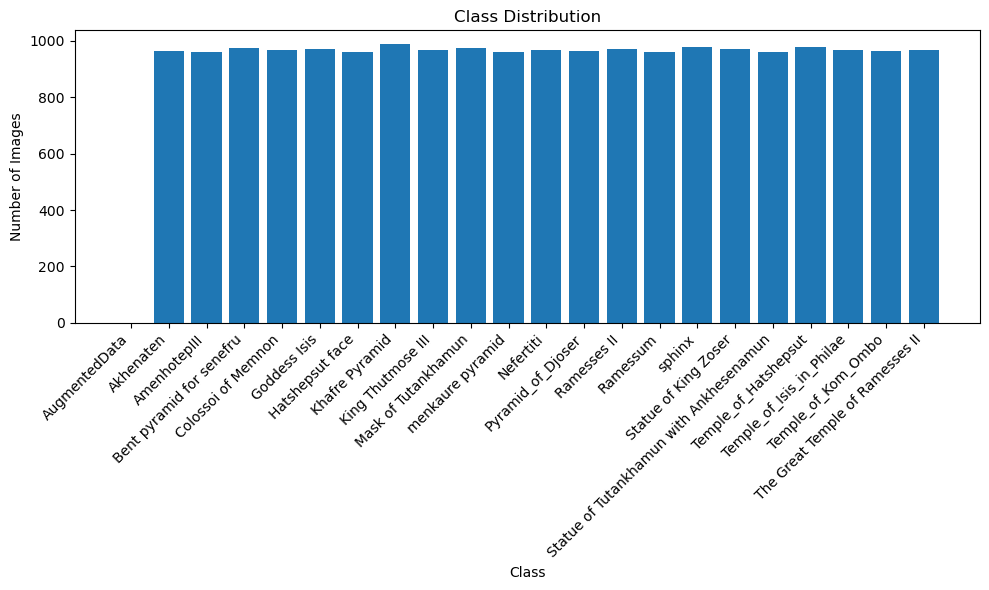

In [ ]:
dataset_path = "AugmentedData"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
   
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()



Total images: 20339

Class-wise counts:
- AugmentedData: 0
- Akhenaten: 964
- AmenhotepIII: 959
- Bent pyramid for senefru: 974
- Colossoi of Memnon: 966
- Goddess Isis: 971
- Hatshepsut face: 961
- Khafre Pyramid: 988
- King Thutmose III: 968
- Mask of Tutankhamun: 976
- menkaure pyramid: 962
- Nefertiti: 966
- Pyramid_of_Djoser: 965
- Ramesses II: 970
- Ramessum: 961
- sphinx: 980
- Statue of King Zoser: 970
- Statue of Tutankhamun with Ankhesenamun: 961
- Temple_of_Hatshepsut: 978
- Temple_of_Isis_in_Philae: 968
- Temple_of_Kom_Ombo: 964
- The Great Temple of Ramesses II: 967


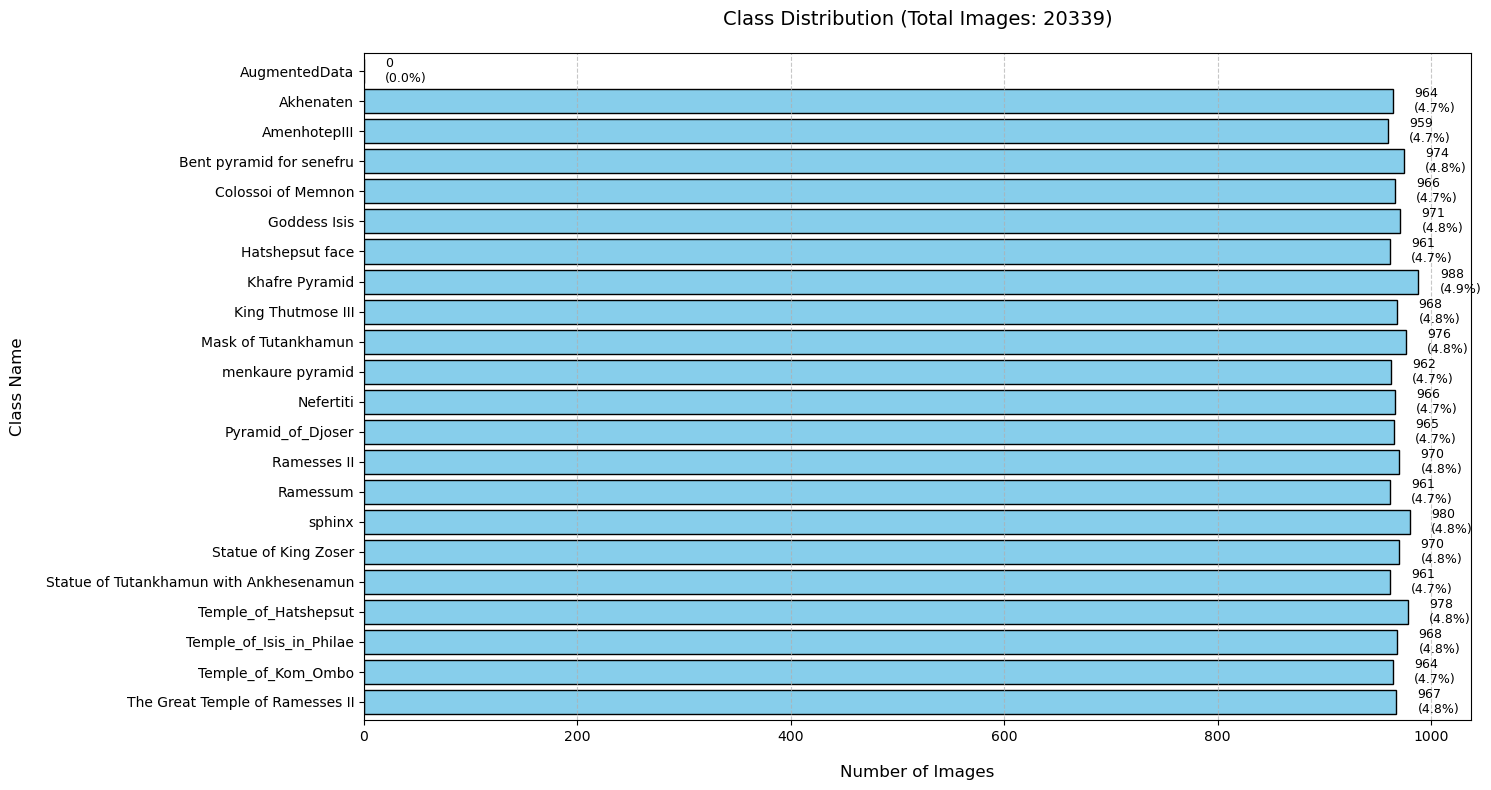

In [ ]:
dataset_path = "AugmentedData"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    
    class_name = os.path.basename(root)
   
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
   
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")



plt.figure(figsize=(15, 8))

bars = plt.barh(list(counts.keys()), list(counts.values()), color='skyblue', edgecolor='black')

plt.xlabel("Number of Images", fontsize=12, labelpad=15)
plt.ylabel("Class Name", fontsize=12, labelpad=15)
plt.title(f"Class Distribution (Total Images: {total})", fontsize=14, pad=20)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, 
             bar.get_y() + bar.get_height()/2, 
             f'{width}\n({width/total:.1%})', 
             va='center', 
             fontsize=9)

plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.margins(y=0.01)  

plt.tight_layout()
plt.show()

## Remove dodgy images

In [21]:
data_dir = 'AugmentedData'

In [22]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list AugmentedData\Akhenaten\001.jpg
Image not in ext list AugmentedData\Akhenaten\002.jpg
Image not in ext list AugmentedData\Akhenaten\035.jpg
Image not in ext list AugmentedData\Akhenaten\036.jpg
Image not in ext list AugmentedData\Akhenaten\037.jpg
Image not in ext list AugmentedData\Akhenaten\038.jpg
Image not in ext list AugmentedData\Akhenaten\101.jpg
Image not in ext list AugmentedData\Akhenaten\112.jpg
Image not in ext list AugmentedData\Akhenaten\121.jpg
Image not in ext list AugmentedData\Akhenaten\122.jpg
Image not in ext list AugmentedData\Akhenaten\123.jpg
Image not in ext list AugmentedData\Akhenaten\125.jpg
Image not in ext list AugmentedData\AmenhotepIII\031.jpg
Image not in ext list AugmentedData\Bent pyramid for senefru\092.jpg
Image not in ext list AugmentedData\Bent pyramid for senefru\093.jpg
Image not in ext list AugmentedData\Bent pyramid for senefru\120.jpg
Image not in ext list AugmentedData\Bent pyramid for senefru\124.jpg
Image not in ext li

### Previewing Augmented Dataset Samples


In [26]:
data = tf.keras.utils.image_dataset_from_directory('AugmentedData')

Found 20256 files belonging to 21 classes.


In [27]:
data_iterator = data.as_numpy_iterator()


In [28]:
batch = data_iterator.next()


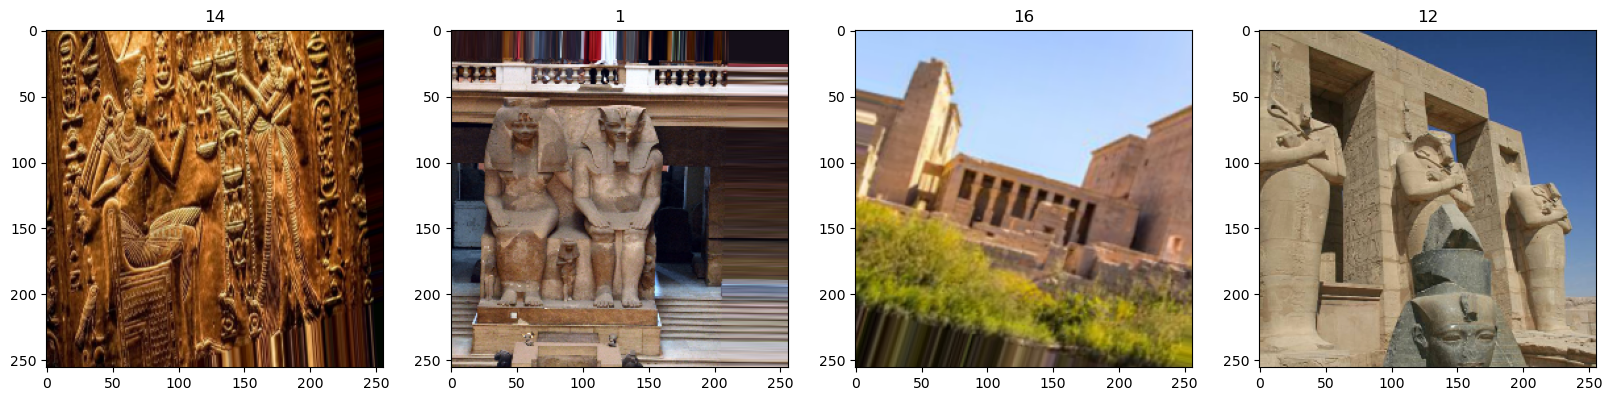

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



### Splitting the Dataset into Training, Validation, and Testing Sets


In [ ]:

input_dir = 'AugmentedData'        
output_dir = 'FinalDataset'        
split_ratios = (0.7, 0.2, 0.1)    

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

for class_name in tqdm(os.listdir(input_dir)):
    class_path = os.path.join(input_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    train_and_val, test = train_test_split(images, test_size=split_ratios[2], random_state=42)
    train, val = train_test_split(train_and_val, test_size=split_ratios[1] / (split_ratios[0] + split_ratios[1]), random_state=42)

    for split_name, split_files in zip(['train', 'val', 'test'], [train, val, test]):
        split_class_dir = os.path.join(output_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for file in split_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(split_class_dir, file)
            shutil.copy2(src, dst)


100%|██████████| 21/21 [01:30<00:00,  4.31s/it]


### Displaying Random Samples from Augmented Dataset


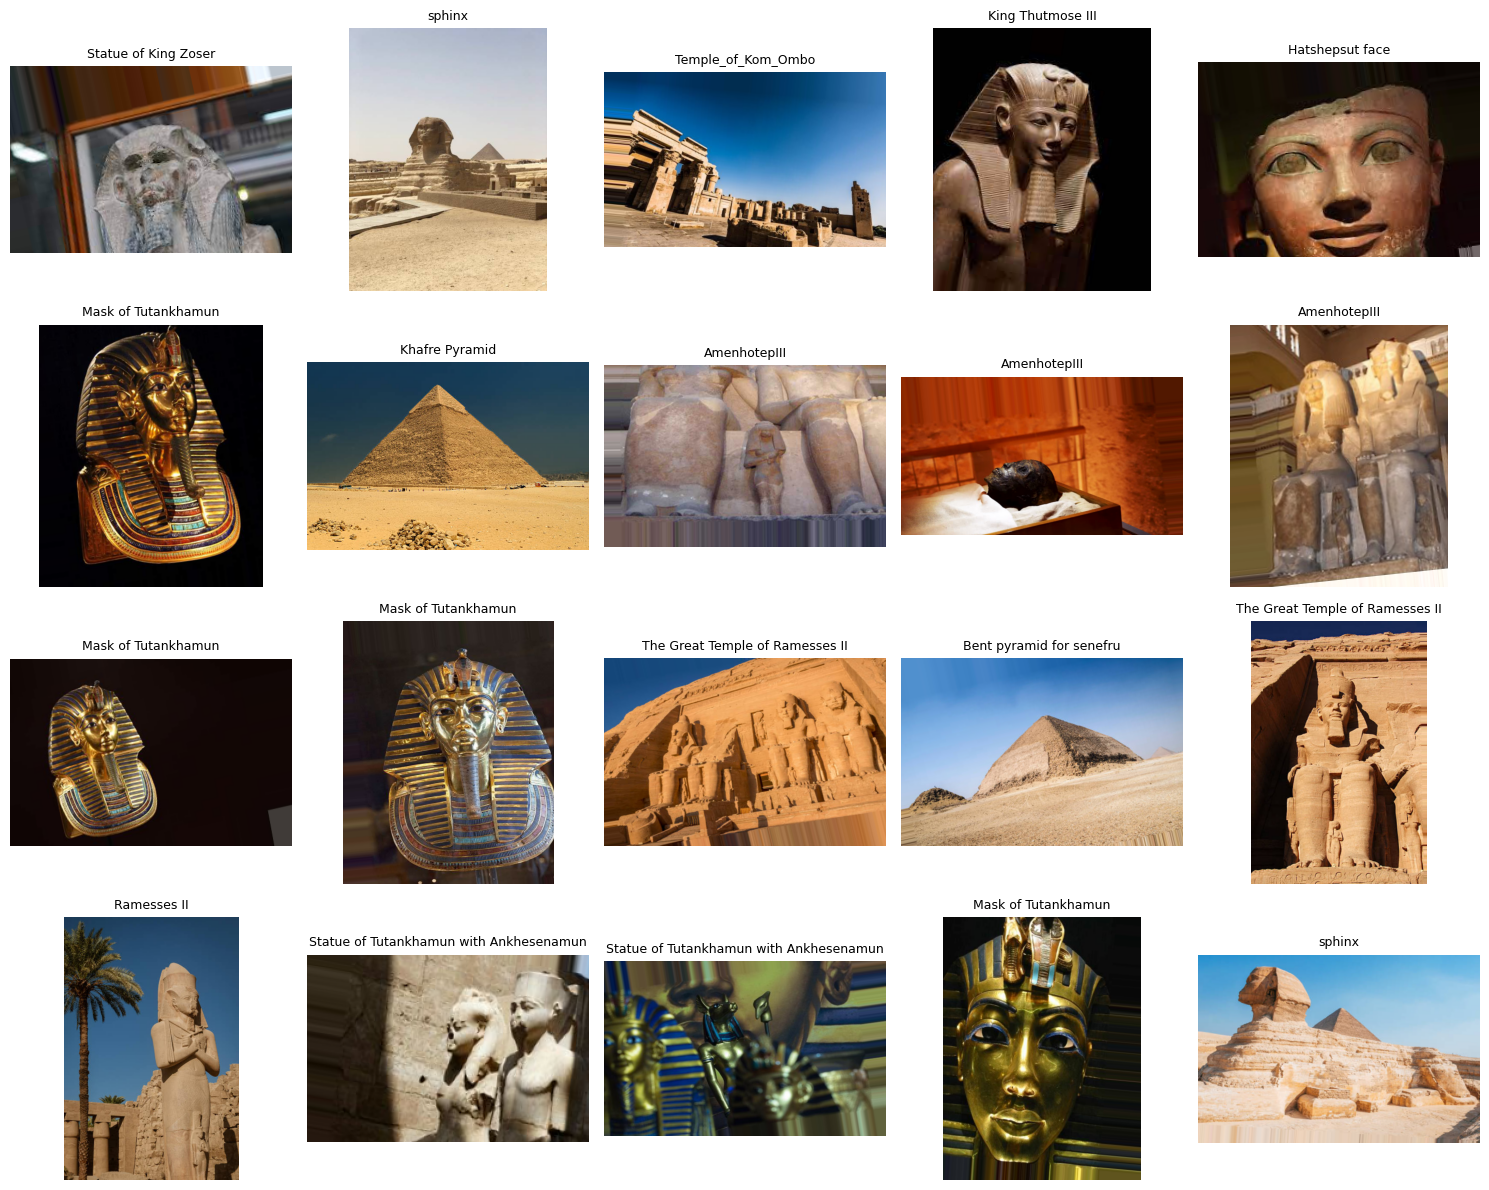

In [ ]:
augmented_dir = 'AugmentedData'

all_images = []
for class_folder in os.listdir(augmented_dir):
    class_path = os.path.join(augmented_dir, class_folder)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(class_path, img_file)
            all_images.append((full_path, class_folder))

sampled_images = random.sample(all_images, 20)

plt.figure(figsize=(15, 12))
for i, (img_path, label) in enumerate(sampled_images):
    img = Image.open(img_path)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Class Distribution Analysis Across Dataset Splits


Total images: 20256

Class-wise counts:
- AugmentedData: 0
- Akhenaten: 952
- AmenhotepIII: 958
- Bent pyramid for senefru: 970
- Colossoi of Memnon: 964
- Goddess Isis: 971
- Hatshepsut face: 960
- Khafre Pyramid: 971
- King Thutmose III: 965
- Mask of Tutankhamun: 972
- menkaure pyramid: 962
- Nefertiti: 960
- Pyramid_of_Djoser: 965
- Ramesses II: 966
- Ramessum: 942
- sphinx: 975
- Statue of King Zoser: 967
- Statue of Tutankhamun with Ankhesenamun: 959
- Temple_of_Hatshepsut: 978
- Temple_of_Isis_in_Philae: 968
- Temple_of_Kom_Ombo: 964
- The Great Temple of Ramesses II: 967


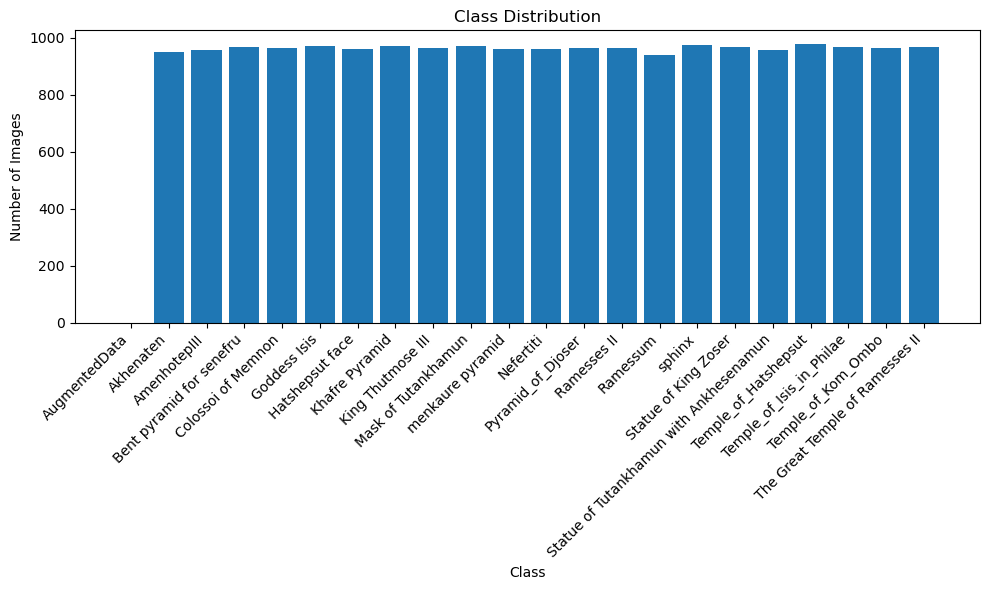

In [ ]:
dataset_path = "AugmentedData"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()



Total images: 2035

Class-wise counts:
- test: 0
- Akhenaten: 96
- AmenhotepIII: 96
- Bent pyramid for senefru: 97
- Colossoi of Memnon: 97
- Goddess Isis: 98
- Hatshepsut face: 96
- Khafre Pyramid: 98
- King Thutmose III: 97
- Mask of Tutankhamun: 98
- menkaure pyramid: 97
- Nefertiti: 96
- Pyramid_of_Djoser: 97
- Ramesses II: 97
- Ramessum: 95
- sphinx: 98
- Statue of King Zoser: 97
- Statue of Tutankhamun with Ankhesenamun: 96
- Temple_of_Hatshepsut: 98
- Temple_of_Isis_in_Philae: 97
- Temple_of_Kom_Ombo: 97
- The Great Temple of Ramesses II: 97


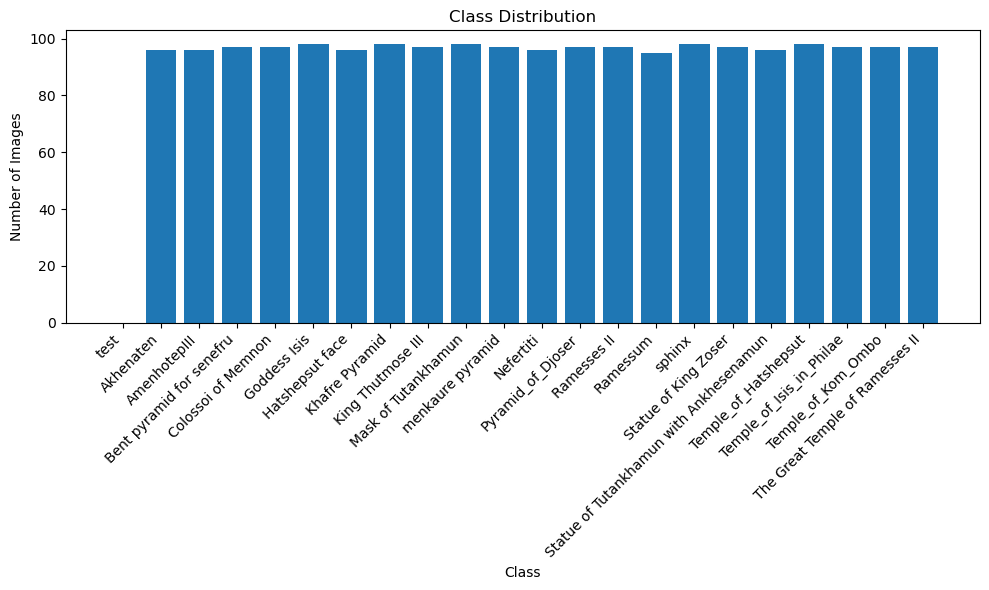

In [ ]:
dataset_path = "FinalDataset/test"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()



Total images: 14159

Class-wise counts:
- train: 0
- Akhenaten: 665
- AmenhotepIII: 670
- Bent pyramid for senefru: 678
- Colossoi of Memnon: 674
- Goddess Isis: 678
- Hatshepsut face: 671
- Khafre Pyramid: 678
- King Thutmose III: 675
- Mask of Tutankhamun: 679
- menkaure pyramid: 672
- Nefertiti: 671
- Pyramid_of_Djoser: 675
- Ramesses II: 675
- Ramessum: 658
- sphinx: 682
- Statue of King Zoser: 676
- Statue of Tutankhamun with Ankhesenamun: 671
- Temple_of_Hatshepsut: 684
- Temple_of_Isis_in_Philae: 677
- Temple_of_Kom_Ombo: 674
- The Great Temple of Ramesses II: 676


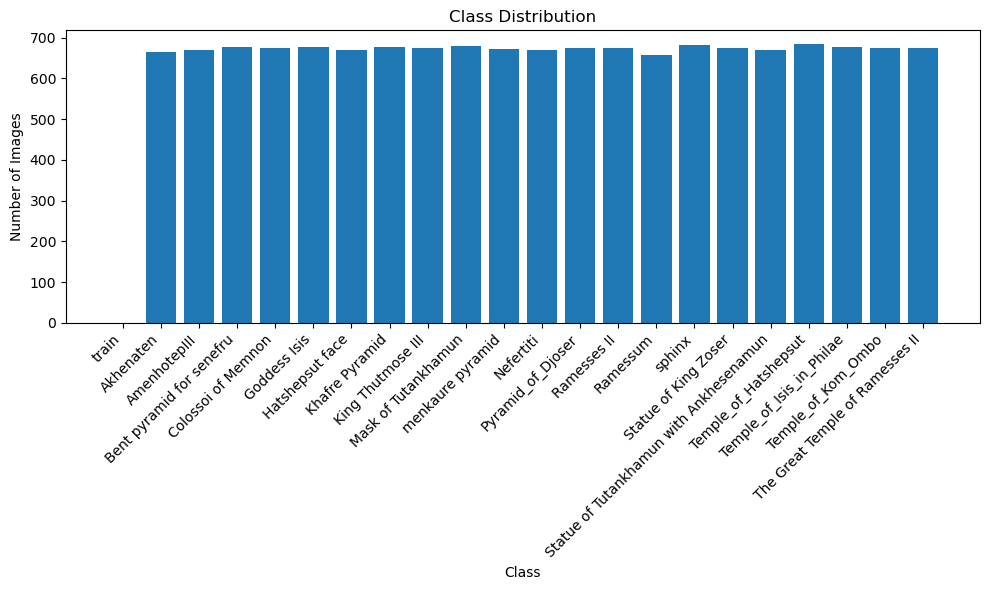

In [ ]:
dataset_path = "FinalDataset/train"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()



Total images: 4062

Class-wise counts:
- val: 0
- Akhenaten: 191
- AmenhotepIII: 192
- Bent pyramid for senefru: 195
- Colossoi of Memnon: 193
- Goddess Isis: 195
- Hatshepsut face: 193
- Khafre Pyramid: 195
- King Thutmose III: 193
- Mask of Tutankhamun: 195
- menkaure pyramid: 193
- Nefertiti: 193
- Pyramid_of_Djoser: 193
- Ramesses II: 194
- Ramessum: 189
- sphinx: 195
- Statue of King Zoser: 194
- Statue of Tutankhamun with Ankhesenamun: 192
- Temple_of_Hatshepsut: 196
- Temple_of_Isis_in_Philae: 194
- Temple_of_Kom_Ombo: 193
- The Great Temple of Ramesses II: 194


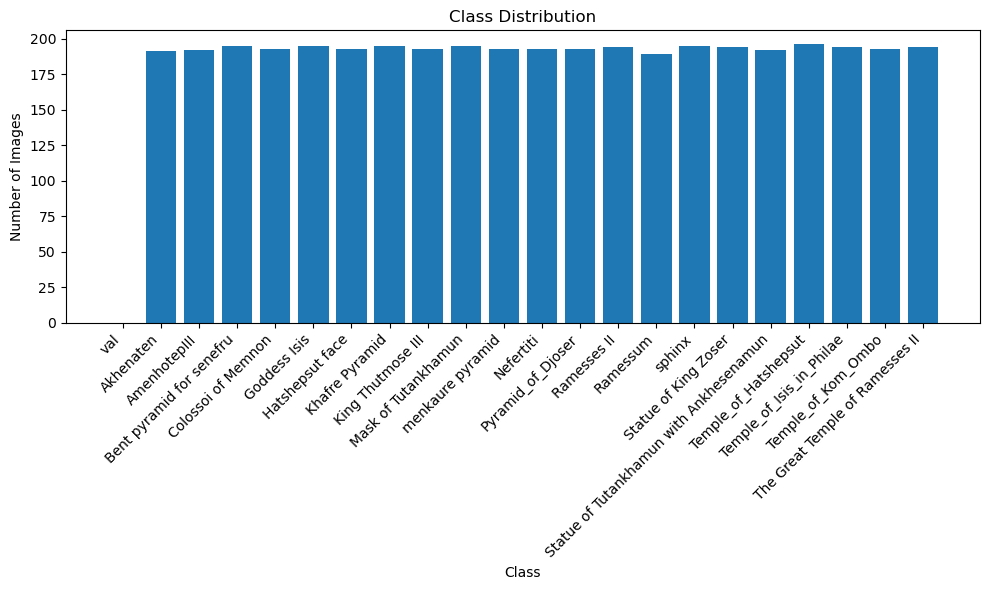

In [ ]:
dataset_path = "FinalDataset/val"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

counts = defaultdict(int)
total = 0

for root, dirs, files in os.walk(dataset_path):
    class_name = os.path.basename(root)
    img_count = 0
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions:
            img_count += 1
    counts[class_name] = img_count
    total += img_count

print(f"\nTotal images: {total}")
print("\nClass-wise counts:")
for class_name, count in counts.items():
    print(f"- {class_name}: {count}")

 
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()
